In [8]:
%matplotlib inline
from proj import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
solnMesh = Mesh(10, 
                np.linspace(0.0,10,11), 
                [1,1,1,1,1,1,1,1,1,1],
                [2,1])
for i in range(4) :
    solnMesh = refineMesh(solnMesh);

In [4]:
xs = getXS()

In [17]:
q = 0.5*np.ones(solnMesh.nX-1)

In [31]:
def sweep(solnMesh, xs, q, N) : 
    # Get quadrature
    [mu,w] = np.polynomial.legendre.leggauss(N)
    
    # Initialize angular flux
    psi = np.zeros([solnMesh.nX-1,N])
    
    # Sweep each direction
    for m in range(N) :
        if mu[m] > 0.0 :
            psiInc = 0.0
            for i in range(solnMesh.nX-1) :
                h = solnMesh.x[i+1]-solnMesh.x[i]
                sigma = xs[solnMesh.mat[i]-1].sigTr[1]
                psi[i,m] = (q[i]*h + 2.0*mu[m]*psiInc)/(sigma*h + 2.0*mu[m])
                psiInc = 2.0*psi[i,m] - psiInc
        else :
            psiInc = 0.0
            for i in range(solnMesh.nX-2,-1,-1) :
                h = solnMesh.x[i+1]-solnMesh.x[i]
                sigma = xs[solnMesh.mat[i]-1].sigTr[1]
                psi[i,m] = (q[i]*h - 2.0*mu[m]*psiInc)/(sigma*h - 2.0*mu[m])
                psiInc = 2.0*psi[i,m] - psiInc
                
    # Calculate scalar flux
    phi = np.zeros(solnMesh.nX-1)
    for i in range(solnMesh.nX-1) :
        for m in range(N) :
            phi[i] = phi[i] + w[m]*psi[i,m]
            
    return phi

In [33]:
phi = sweep(solnMesh,xs,q,6)

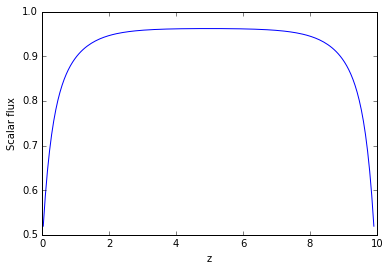

In [34]:
xCell = np.zeros(solnMesh.nX-1);
for i in range(solnMesh.nX-1) :
    xCell[i] = (solnMesh.x[i]+solnMesh.x[i+1])/2.0;

plt.plot(xCell,phi)
plt.xlabel('z')
plt.ylabel('Scalar flux')

In [36]:
solnMesh.nX

160